<a href="https://colab.research.google.com/github/dtb00789/CubsDecadeAnalysis/blob/main/CubsDecadeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Rise and Fall of the 2010's Chicago Cubs#

At the start of the 2010's, the Chicago Cubs began a journey to break the longest championship drought in sports history. The team had one of the most successful rebuilding campaigns in baseball, finally managing to win the 2016 World Series. What's more, that championship was supposed to be the first of many in what many pundits labeled as a new dynasty in baseball. They were talented, young, experienced and still had players in their development system ready to join the main club. Now, at the end of the decade, it is clear that the dynasty in the making had flaws. The goal of this project is to analyze both the meteoric rise and slow decent of the Chicago Cubs in the 2010's, and determine how they managed to find success in the short term, but failed to capitalize on that same success in the long term.

This project will break down the key factors that make up a baseball team, the offense and the pitching/defense. The goal is to see how the Cubs matched up in these metrics with other teams in the league during each season of the decade, with a particular focus on their 2016 season, when they won the World Series. Then, after finding what brought the club success that season, a focus on later years will look to determine why they weren't able to sustain that level of success.

##MLB Team Data Upload##

The first step is to upload data from FanGraphs and Teamrankings for offensive and pitching/defensive stats for all teams during the decade as well as team records. These statistics are advanced metrics that can be difficult to understand at first, particularly if you don't know baseball, so there will be a section devoted to exploring the important statistics and explaining what they describe.

### Offensive Statistics Upload ###

The following shows the process for preparing the offensive statistics for the 2010's seasons into a single DataFrame.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# The batting stats for the 2010's by team
bat19 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=1&season=2019&month=0&season1=2019&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2019-01-01&enddate=2019-12-31'
bat18 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=1&season=2018&month=0&season1=2018&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2018-01-01&enddate=2018-12-31'
bat17 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=1&season=2017&month=0&season1=2017&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2017-01-01&enddate=2017-12-31'
bat16 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=1&season=2016&month=0&season1=2016&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2016-01-01&enddate=2016-12-31'
bat15 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=1&season=2015&month=0&season1=2015&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2015-01-01&enddate=2015-12-31'
bat14 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=1&season=2014&month=0&season1=2014&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2014-01-01&enddate=2014-12-31'
bat13 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=1&season=2013&month=0&season1=2013&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2013-01-01&enddate=2013-12-31'
bat12 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=1&season=2012&month=0&season1=2012&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2012-01-01&enddate=2012-12-31'
bat11 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=1&season=2011&month=0&season1=2011&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2011-01-01&enddate=2011-12-31'
bat10 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=1&season=2010&month=0&season1=2010&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2010-01-01&enddate=2010-12-31'

# Reading the stats into pandas
bat19 = pd.read_html(bat19)
bat18 = pd.read_html(bat18)
bat17 = pd.read_html(bat17)
bat16 = pd.read_html(bat16)
bat15 = pd.read_html(bat15)
bat14 = pd.read_html(bat14)
bat13 = pd.read_html(bat13)
bat12 = pd.read_html(bat12)
bat11 = pd.read_html(bat11)
bat10 = pd.read_html(bat10)

# Converting to DataFrames
bat19df = bat19[16]
bat18df = bat18[16]
bat17df = bat17[16]
bat16df = bat16[16]
bat15df = bat15[16]
bat14df = bat14[16]
bat13df = bat13[16]
bat12df = bat12[16]
bat11df = bat11[16]
bat10df = bat10[16]

# Creating a list of DataFrames for offensive metrics
o_list = [bat10df, bat11df, bat12df, bat13df, bat14df, bat15df, bat16df, bat17df,
          bat18df, bat19df]


In [ ]:
# Cleaning the DataFrames and marking their respective seasons
o_data = []
for i, df in enumerate(o_list):
  new_df = df.set_axis(['#','Team',	'PA',	'BB%',	'K%',	'BB/K',	'AVG',	'OBP',	'SLG',
                  'OPS',	'ISO',	'Spd',	'BABIP',	'UBR',	'wGDP',	'wSB',
                  'wRC',	'wRAA',	'wOBA',	'wRC+'], axis = 'columns')
  new_df = new_df.drop([30], axis=0)
  new_df['Season'] = 2010 + i
  o_data.append(new_df)

In [ ]:
# Fixing FLA to MIA problem
mask10 = o_data[0]['Team'] == 'FLA'
mask11 = o_data[1]['Team'] == 'FLA'

o_data[0].loc[mask10, 'Team'] = 'MIA'
o_data[1].loc[mask11, 'Team'] = 'MIA'

In [ ]:
# Setting indeces as Season and Team
oData = []
for df in o_data:
  new_df = df.set_index(['Team', 'Season'])
  oData.append(new_df)

In [ ]:
# Concatenating all offensive season statistics into one DataFrame
o_merge = oData[0]
for j in range(len(oData) - 1):
  o_merge = pd.concat([o_merge, oData[j + 1]], axis = 0)

In [ ]:
r, c = o_merge.shape
print("Out of 300 seasons, there are {} missing for offensive stats".format(300 - r))

Out of 300 seasons, there are 0 missing for offensive stats


In [ ]:
o_merge.isnull().any()

#        False
PA       False
BB%      False
K%       False
BB/K     False
AVG      False
OBP      False
SLG      False
OPS      False
ISO      False
Spd      False
BABIP    False
UBR      False
wGDP     False
wSB      False
wRC      False
wRAA     False
wOBA     False
wRC+     False
dtype: bool

In [ ]:
o_merge.head()

,,#,PA,BB%,K%,BB/K,AVG,OBP,SLG,OPS,ISO,Spd,BABIP,UBR,wGDP,wSB,wRC,wRAA,wOBA,wRC+
Team,Season,,,,,,,,,,,,,,,,,,,
NYY,2010,1,6379,10.4%,17.8%,0.58,.267,.350,.436,.786,.169,4.8,.300,3.4,5.3,3.4,860,127.4,.346,112
BOS,2010,2,6356,9.2%,17.9%,0.51,.268,.339,.451,.790,.183,4.1,.299,-11.0,1.7,2.1,851,121.3,.345,109
CIN,2010,3,6285,8.3%,19.4%,0.43,.272,.338,.436,.774,.164,4.4,.314,11.2,5.0,-3.5,812,90.0,.340,106
MIN,2010,4,6257,8.9%,15.5%,0.58,.273,.341,.422,.762,.148,4.5,.306,-6.9,-6.4,-2.5,787,68.0,.335,106
MIL,2010,5,6304,8.7%,19.3%,0.45,.262,.335,.424,.759,.161,4.4,.304,-4.5,4.1,1.0,788,64.2,.334,104


###Defensive Statistics Upload###

The same process for uploading the offensive statistics will be repeated for defensive metrics.

In [ ]:
# Location for defensive statistics
pit19 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=0&type=1&season=2019&month=0&season1=2019&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2019-01-01&enddate=2019-12-31'
pit18 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=0&type=1&season=2018&month=0&season1=2018&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2018-01-01&enddate=2018-12-31'
pit17 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=0&type=1&season=2017&month=0&season1=2017&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2017-01-01&enddate=2017-12-31'
pit16 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=0&type=1&season=2016&month=0&season1=2016&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2016-01-01&enddate=2016-12-31'
pit15 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=0&type=1&season=2015&month=0&season1=2015&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2015-01-01&enddate=2015-12-31'
pit14 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=0&type=1&season=2014&month=0&season1=2014&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2014-01-01&enddate=2014-12-31'
pit13 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=0&type=1&season=2013&month=0&season1=2013&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2013-01-01&enddate=2013-12-31'
pit12 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=0&type=1&season=2012&month=0&season1=2012&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2012-01-01&enddate=2012-12-31'
pit11 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=0&type=1&season=2011&month=0&season1=2011&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2011-01-01&enddate=2011-12-31'
pit10 = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=0&type=1&season=2010&month=0&season1=2010&ind=0&team=0,ts&rost=0&age=0&filter=&players=0&startdate=2010-01-01&enddate=2010-12-31'

# Upload to pandas
pit19 = pd.read_html(pit19)
pit18 = pd.read_html(pit18)
pit17 = pd.read_html(pit17)
pit16 = pd.read_html(pit16)
pit15 = pd.read_html(pit15)
pit14 = pd.read_html(pit14)
pit13 = pd.read_html(pit13)
pit12 = pd.read_html(pit12)
pit11 = pd.read_html(pit11)
pit10 = pd.read_html(pit10)


# Conversion to DataFrames
pit19df = pit19[16]
pit18df = pit18[16]
pit17df = pit17[16]
pit16df = pit16[16]
pit15df = pit15[16]
pit14df = pit14[16]
pit13df = pit13[16]
pit12df = pit12[16]
pit11df = pit11[16]
pit10df = pit10[16]

# Creating list of DataFrames
d_list = [pit10df, pit11df, pit12df, pit13df, pit14df, pit15df, pit16df,
          pit17df, pit18df, pit19df]

In [ ]:
# Cleaning data and adding the respective seasons
d_data = []
for i, df in enumerate(d_list):
  new_df = df.set_axis(['#','Team','K/9','BB/9','K/BB','HR/9','K%','BB%',
                        'K-BB%','AVG','WHIP','BABIP','LOB%','ERA-','FIP-',
                        'xFIP-','ERA','FIP','E-F','xFIP','SIERA'], axis = 'columns')
  new_df = new_df.drop([30], axis=0)
  new_df['Season'] = 2010 + i
  d_data.append(new_df)

In [ ]:
# Fixing FLA to MIA problem
mask10 = d_data[0]['Team'] == 'FLA'
mask11 = d_data[1]['Team'] == 'FLA'

d_data[0].loc[mask10, 'Team'] = 'MIA'
d_data[1].loc[mask11, 'Team'] = 'MIA'

In [ ]:
dData = []
for df in d_data:
  new_df = df.set_index(['Team', 'Season'])
  dData.append(new_df)

In [ ]:
# Concatenating DataFrames into the same DataFrame
d_merge = dData[0]
for j in range(len(dData) - 1):
  d_merge = pd.concat([d_merge, dData[j + 1]], axis = 0)

In [ ]:
r, c = d_merge.shape
print("Out of 300 seasons, there are {} missing for defensive stats".format(300 - r))

Out of 300 seasons, there are 0 missing for defensive stats


In [ ]:
d_merge.isnull().any()

#        False
K/9      False
BB/9     False
K/BB     False
HR/9     False
K%       False
BB%      False
K-BB%    False
AVG      False
WHIP     False
BABIP    False
LOB%     False
ERA-     False
FIP-     False
xFIP-    False
ERA      False
FIP      False
E-F      False
xFIP     False
SIERA    False
dtype: bool

In [ ]:
d_merge.head()

,,#,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,AVG,WHIP,BABIP,LOB%,ERA-,FIP-,xFIP-,ERA,FIP,E-F,xFIP,SIERA
Team,Season,,,,,,,,,,,,,,,,,,,,
ATL,2010,1,7.76,3.16,2.46,0.79,20.5%,8.3%,12.2%,.241,1.27,.290,73.4%,89,92,91,3.57,3.65,-0.08,3.65,3.62
SDP,2010,2,8.00,3.20,2.50,0.86,21.4%,8.5%,12.8%,.237,1.25,.286,76.7%,92,95,92,3.41,3.66,-0.26,3.67,3.63
SFG,2010,3,8.20,3.56,2.30,0.83,21.6%,9.4%,12.2%,.231,1.27,.282,77.0%,87,97,99,3.36,3.74,-0.38,3.94,3.79
LAD,2010,4,7.95,3.36,2.36,0.84,20.7%,8.8%,12.0%,.239,1.29,.287,70.9%,105,96,97,4.01,3.76,0.25,3.87,3.76
CHW,2010,5,7.15,3.05,2.34,0.85,18.6%,7.9%,10.7%,.260,1.36,.305,71.5%,94,87,94,4.09,3.80,0.30,3.94,3.91


###Standings###

This section adds standings for each season for each team from teamrankings.com and merges them with the existing offensive and defensive statistics.

In [ ]:
# Standings for each season
standing10 = 'https://www.teamrankings.com/mlb/trends/win_trends/?range=yearly_mlb_2010'
standing11 = 'https://www.teamrankings.com/mlb/trends/win_trends/?range=yearly_mlb_2011'
standing12 = 'https://www.teamrankings.com/mlb/trends/win_trends/?range=yearly_mlb_2012'
standing13 = 'https://www.teamrankings.com/mlb/trends/win_trends/?range=yearly_mlb_2013'
standing14 = 'https://www.teamrankings.com/mlb/trends/win_trends/?range=yearly_mlb_2014'
standing15 = 'https://www.teamrankings.com/mlb/trends/win_trends/?range=yearly_mlb_2015'
standing16 = 'https://www.teamrankings.com/mlb/trends/win_trends/?range=yearly_mlb_2016'
standing17 = 'https://www.teamrankings.com/mlb/trends/win_trends/?range=yearly_mlb_2017'
standing18 = 'https://www.teamrankings.com/mlb/trends/win_trends/?range=yearly_mlb_2018'
standing19 = 'https://www.teamrankings.com/mlb/trends/win_trends/?range=yearly_mlb_2019'

# Reading into pandas
standing10 = pd.read_html(standing10)
standing11 = pd.read_html(standing11)
standing12 = pd.read_html(standing12)
standing13 = pd.read_html(standing13)
standing14 = pd.read_html(standing14)
standing15 = pd.read_html(standing15)
standing16 = pd.read_html(standing16)
standing17 = pd.read_html(standing17)
standing18 = pd.read_html(standing18)
standing19 = pd.read_html(standing19)



In [ ]:
# Creating list of standings
standing_list = [standing10, standing11, standing12, standing13, standing14,
                 standing15, standing16, standing17, standing18, standing19]

In [ ]:
# Creating DataFrame of team names to abbreviations for merging
team_df = pd.DataFrame(standing10[0]['Team'])

team_df['Abbreviation'] = pd.Series(['PHI', 'TBR', 'NYY', 'SFG', 'MIN', 'SDP', 'ATL', 'CIN',
                           'TEX', 'BOS', 'CHW', 'STL', 'TOR', 'COL', 'DET', 'OAK',
                           'LAD', 'MIA', 'LAA', 'NYM', 'MIL', 'HOU', 'CHC', 'WSN',
                           'CLE', 'KCR', 'BAL', 'ARI', 'SEA', 'PIT'])

In [ ]:
# Adds the abbreviations and season to the standings lists
for i, df in enumerate(standing_list):
  df[0]['Season'] = 2010 + i
  df[0] = pd.merge(df[0], team_df, left_on='Team', right_on='Team')

In [ ]:
# Concatenates all standings into one DataFrame
team_rec = standing10[0]
for j in range(len(standing_list) - 1):
  team_rec = pd.concat([team_rec, standing_list[j + 1][0]], axis = 0)

In [ ]:
# Drops the full name team from the team records, then renames Abbreviation to Team
team_rec = team_rec.drop('Team', axis = 1)
team_rec = team_rec.rename(columns={'Abbreviation':'Team'})

In [ ]:
team_rec = team_rec.set_index(['Team', 'Season'])

In [ ]:
# Merges the standings with the defensive metrics
d_merge = pd.merge(d_merge, team_rec, left_index=True, right_index=True)
r, c = d_merge.shape
print("Out of 300 seasons, there are {} missing for defensive stats".format(300 - r))

Out of 300 seasons, there are 0 missing for defensive stats


In [ ]:
d_merge.isnull().any()

#                  False
K/9                False
BB/9               False
K/BB               False
HR/9               False
K%                 False
BB%                False
K-BB%              False
AVG                False
WHIP               False
BABIP              False
LOB%               False
ERA-               False
FIP-               False
xFIP-              False
ERA                False
FIP                False
E-F                False
xFIP               False
SIERA              False
Win-Loss Record    False
Win %              False
MOV                False
Run Line +/-       False
dtype: bool

In [ ]:
d_merge.head()

,,#,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,AVG,WHIP,BABIP,LOB%,ERA-,FIP-,xFIP-,ERA,FIP,E-F,xFIP,SIERA,Win-Loss Record,Win %,MOV,Run Line +/-
Team,Season,,,,,,,,,,,,,,,,,,,,,,,,
ATL,2010,1,7.76,3.16,2.46,0.79,20.5%,8.3%,12.2%,.241,1.27,.290,73.4%,89,92,91,3.57,3.65,-0.08,3.65,3.62,92-74-0,55.4%,0.6,-0.1
SDP,2010,2,8.00,3.20,2.50,0.86,21.4%,8.5%,12.8%,.237,1.25,.286,76.7%,92,95,92,3.41,3.66,-0.26,3.67,3.63,90-72-0,55.6%,0.5,0.5
SFG,2010,3,8.20,3.56,2.30,0.83,21.6%,9.4%,12.2%,.231,1.27,.282,77.0%,87,97,99,3.36,3.74,-0.38,3.94,3.79,103-74-0,58.2%,0.7,0.5
LAD,2010,4,7.95,3.36,2.36,0.84,20.7%,8.8%,12.0%,.239,1.29,.287,70.9%,105,96,97,4.01,3.76,0.25,3.87,3.76,80-82-0,49.4%,-0.2,-0.4
CHW,2010,5,7.15,3.05,2.34,0.85,18.6%,7.9%,10.7%,.260,1.36,.305,71.5%,94,87,94,4.09,3.80,0.30,3.94,3.91,88-74-0,54.3%,0.3,0.0


In [ ]:
o_merge = pd.merge(o_merge, team_rec, left_index=True, right_index=True)
r, c = o_merge.shape
print("Out of 300 seasons, there are {} missing for offensive stats".format(300 - r))

Out of 300 seasons, there are 0 missing for offensive stats


In [ ]:
o_merge.isnull().any()

#                  False
PA                 False
BB%                False
K%                 False
BB/K               False
AVG                False
OBP                False
SLG                False
OPS                False
ISO                False
Spd                False
BABIP              False
UBR                False
wGDP               False
wSB                False
wRC                False
wRAA               False
wOBA               False
wRC+               False
Win-Loss Record    False
Win %              False
MOV                False
Run Line +/-       False
dtype: bool

In [ ]:
o_merge.head()

,,#,PA,BB%,K%,BB/K,AVG,OBP,SLG,OPS,ISO,Spd,BABIP,UBR,wGDP,wSB,wRC,wRAA,wOBA,wRC+,Win-Loss Record,Win %,MOV,Run Line +/-
Team,Season,,,,,,,,,,,,,,,,,,,,,,,
NYY,2010,1,6379,10.4%,17.8%,0.58,.267,.350,.436,.786,.169,4.8,.300,3.4,5.3,3.4,860,127.4,.346,112,100-71-0,58.5%,0.9,-0.2
BOS,2010,2,6356,9.2%,17.9%,0.51,.268,.339,.451,.790,.183,4.1,.299,-11.0,1.7,2.1,851,121.3,.345,109,89-73-0,54.9%,0.5,-0.2
CIN,2010,3,6285,8.3%,19.4%,0.43,.272,.338,.436,.774,.164,4.4,.314,11.2,5.0,-3.5,812,90.0,.340,106,91-74-0,55.1%,0.6,0.5
MIN,2010,4,6257,8.9%,15.5%,0.58,.273,.341,.422,.762,.148,4.5,.306,-6.9,-6.4,-2.5,787,68.0,.335,106,94-71-0,57.0%,0.6,0.2
MIL,2010,5,6304,8.7%,19.3%,0.45,.262,.335,.424,.759,.161,4.4,.304,-4.5,4.1,1.0,788,64.2,.334,104,77-85-0,47.5%,-0.3,-0.4


##Determining How a Team Succeeds##

With offensive and defensive statistics for the decade gathered along with the team's corresponding record for that season, the data needs to be narrowed down to a handful of core statistics that will predict a team's success for that season. For this analysis, there will be three statistics used to measure offensive and defensive success.

###Defensive Metrics###
***
***FIP (Fielding Independent Pitching)***:

This metric predicts a pitcher's run prevention ability independent of the performance of the defense behind them. It is characterized by the following equation: 

$$FIP = \frac{13(HR) + 3(BB + HBP) - 2(K)}{IP}$$


***xFIP (Expected Fielding Independent Pitching***:

The exact same statistic as FIP, but instead predicts what a pitcher's FIP *should* have been. It is modeled by the equation:

$$xFIP = \frac{13(Flyballs * LgHR/FB\%) + 3(BB + HBP) - 2(K)}{IP}$$

The only difference is that it replaces pure home runs with the number of home runs the pitcher likely should have given up.

***BABIP (Batting Average on Balls In Play)***

BABIP measures the number of times that non-home run batted balls fall for hits. This statistic will be important for this study because it is primarily affected by two major factors; defense and luck. A higher BABIP means that more balls put in play fell for hits. It is characterized by the following equation:

$$BABIP = \frac{H - HR}{AB - HR - K + SF}$$
***


The following will create the simplified defensive metrics DataFrame.

In [ ]:
"""
Converts the percentages column to float values without a % sign.

:Param dfSeries: The series to remove the % sign from
:Return: The new series to take its place
"""
def perc_conv(dfSeries):
  new_vals = []
  for perc in dfSeries:
    new_val = ""
    for i, char in enumerate(perc):
      if i !=  4:
        new_val += char
    new_val = float(new_val)
    new_vals.append(new_val)
    
  new_series = pd.Series(new_vals)
  return new_series

In [ ]:
# The creation of the new DataFrame
d_metrics = d_merge[['FIP', 'xFIP', 'BABIP', 'Win %']]
new_perc = perc_conv(d_metrics['Win %'])
new_perc.index = d_metrics.index
d_metrics['Win %'] = new_perc
d_metrics = d_metrics.astype(float)
d_metrics.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


FIP      float64
xFIP     float64
BABIP    float64
Win %    float64
dtype: object

In [ ]:
r, c = d_metrics.shape
print("Defensive Metrics DataFrame has {} rows and {} columns".format(r, c))
print("There are {} missing team performances".format(300 - r))

Defensive Metrics DataFrame has 300 rows and 4 columns
There are 0 missing team performances


In [ ]:
d_metrics.isnull().any()

FIP      False
xFIP     False
BABIP    False
Win %    False
dtype: bool

In [ ]:
d_metrics.head()

,,FIP,xFIP,BABIP,Win %
Team,Season,,,,
ATL,2010,3.65,3.65,0.290,55.4
SDP,2010,3.66,3.67,0.286,55.6
SFG,2010,3.74,3.94,0.282,58.2
LAD,2010,3.76,3.87,0.287,49.4
CHW,2010,3.80,3.94,0.305,54.3


###Offense###
***
***wOBA (weighted on-base average)***:

wOBA is a measure of on-base percentage that treats outcomes for getting on-base differently based on the way the batter reached base. Those weights can be seen in the following formula:

$$wOBA = \frac{.69(uBB) + .72(HBP) + .89(1B) + 1.27(2B) + 1.62(3B) + 2.10(HR)}{AB + BB - IBB + SF + HBP}$$


***wRC+ (weighted runs created adjusted)***:

Measures the runs created by a team above or below average, where a point above or below 100 is a percentage point greater or less than average created by the team (ie 120 means 20% more runs than average and 80 means 20% less). The stat is adjusted for environmental factors including the league and ballpark played in. For the sake of simplicity, we will assume the number is accurate rather than try to show the calculation for the statistic. It is a widely accepted single measure of offensive performance.

***BABIP***

The same as for defense, but for the offense instead.

***
The following will create the simplified offensive metrics DataFrame.

In [ ]:
# Creation of simplified DataFrame
o_metrics = o_merge[['wOBA', 'wRC+', 'BABIP', 'Win %']]
new_perc = perc_conv(o_metrics['Win %'])
new_perc.index = o_metrics.index
o_metrics['Win %'] = new_perc
o_metrics = o_metrics.astype(float)
o_metrics.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


wOBA     float64
wRC+     float64
BABIP    float64
Win %    float64
dtype: object

In [ ]:
r, c = o_metrics.shape
print("Offensive Metrics DataFrame has {} rows and {} columns".format(r, c))
print("There are {} missing team performances".format(300 - r))

Offensive Metrics DataFrame has 300 rows and 4 columns
There are 0 missing team performances


In [ ]:
o_metrics.isnull().any()

wOBA     False
wRC+     False
BABIP    False
Win %    False
dtype: bool

In [ ]:
o_metrics.head()

,,wOBA,wRC+,BABIP,Win %
Team,Season,,,,
NYY,2010,0.346,112.0,0.300,58.5
BOS,2010,0.345,109.0,0.299,54.9
CIN,2010,0.340,106.0,0.314,55.1
MIN,2010,0.335,106.0,0.306,57.0
MIL,2010,0.334,104.0,0.304,47.5


##Analyzing the Cubs##

With the data sorted to provide metrics on performance of a team, the first part of this analysis is to look at the performance of the Chicago Cubs as a team over the decade.

###Organizing Data###

The following section shows the process for isolating and organizing the offensive and defensive metrics for the Cubs over the decade.

In [ ]:
# Isolating the Cubs offensive metrics
o_metrics = o_metrics.reset_index()
cubs_mask = o_metrics['Team'] == 'CHC'
cubs_ostats = o_metrics[cubs_mask].drop(['Team'], axis = 1).set_index('Season')
cubs_ostats

,wOBA,wRC+,BABIP,Win %
Season,,,,
2010,0.318,90.0,0.304,46.3
2011,0.314,91.0,0.301,43.8
2012,0.297,81.0,0.286,37.6
2013,0.304,90.0,0.275,40.7
2014,0.303,91.0,0.296,45.1
2015,0.313,96.0,0.305,59.1
2016,0.333,106.0,0.302,64.0
2017,0.331,101.0,0.302,55.8
2018,0.321,100.0,0.313,57.9


In [ ]:
# Isolating the Cubs defensive metrics
d_metrics = d_metrics.reset_index()
cubs_mask = d_metrics['Team'] == 'CHC'
cubs_dstats = d_metrics[cubs_mask].drop(['Team'], axis = 1).set_index('Season')
cubs_dstats

,FIP,xFIP,BABIP,Win %
Season,,,,
2010,4.11,4.08,0.298,46.3
2011,4.11,4.02,0.301,43.8
2012,4.46,4.39,0.291,37.6
2013,4.10,4.13,0.279,40.7
2014,3.51,3.70,0.304,45.1
2015,3.30,3.37,0.287,59.1
2016,3.77,3.74,0.255,64.0
2017,4.20,4.10,0.285,55.8
2018,4.14,4.29,0.284,57.9


In [ ]:
# Prepping formatting for visualization of the data

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 10) 
plt.style.use('ggplot')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

###Defensive Metrics for the Decade###

Shows the Cubs defensive performance over the 2010s.

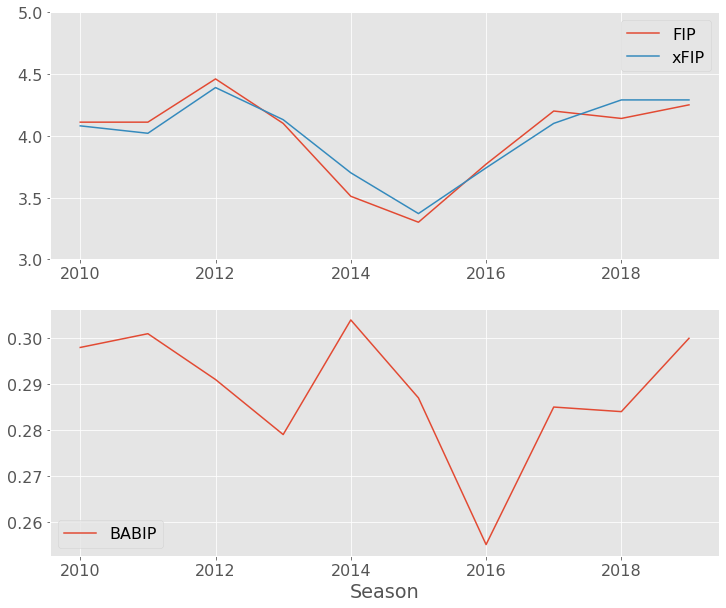

In [ ]:
fig1, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(cubs_dstats.index, cubs_dstats['FIP'], label = 'FIP')
ax1.plot(cubs_dstats.index, cubs_dstats['xFIP'], label = 'xFIP')
ax1.set_ylim(3, 5)
ax1.legend()

ax2.plot(cubs_dstats.index, cubs_dstats['BABIP'], label = 'BABIP')
ax2.set_xlabel('Season')
ax2.legend()
fig1.show()

If nothing else was taken away from the selection process for the statistics, for Figure 1 just know that low is good. What Figure 1 shows is the pitching statistics for the Cubs this decade in the first subplot and the BABIP (or defensive/luck statistic) in the second. With regards to the FIP and xFIP, there was very little deviation between the values which suggests that the pitching itself was as good as the statistic expected it to be. This is interesting because the Cubs pitching actually *worsened* in 2016 from the previous season. In fact, the year prior their FIP was actually quite good, but as early as 2016 it was showing signs of a return to the mean (somewhere in the 4.00 range).

However, FIP only accounts for true outcome baseball, which is why BABIP is so important as a comparison by showing the alternative (where balls are put in play in the field). In 2016, the Cubs had a ***0.255*** BABIP; that is not just good, it is INSANE. If anything, considering that the Cubs did better in 2016, the increase in FIP during the season only adds more weight to the importance of that statistic. When there is a major shift in BABIP, *especially* as a defensive metric, it is a really good indication that a significant amount of luck affected the number, especially if the BABIP for a given year normalizes to something reasonable in the years prior and post, as it did in the Cubs' case. The absurdity of that 2016 defensive BABIP will be explored later.

Defensive metrics are important, but did the offense play an important role in helping the Cubs win a World Series? The young hitting core the team developed was supposedly paramount not only to winning that year, but creating a dynasty for years to come. Figure 2 shows the offensive metrics over the same span of time.

###Offensive Metrics for the Decade###

A look at the offensive metrics of the decade for the Cubs.

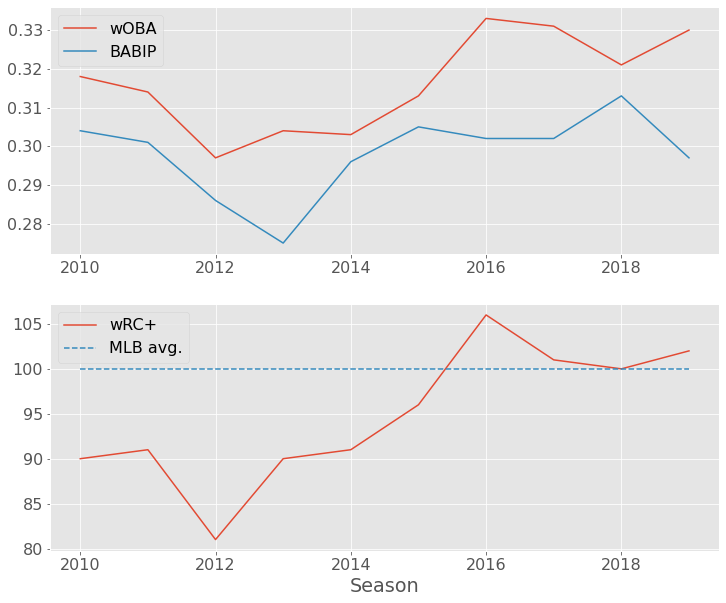

In [ ]:
fig2, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(cubs_ostats.index, cubs_ostats['wOBA'], label = 'wOBA')
ax1.plot(cubs_ostats.index, cubs_ostats['BABIP'], label = 'BABIP')
ax1.legend()

ax2.plot(cubs_ostats.index, cubs_ostats['wRC+'], label = 'wRC+')
ax2.plot(np.linspace(2010, 2019, 10), [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], '--', label = 'MLB avg.')
ax2.set_xlabel('Season')
ax2.legend()
fig2.show()

In Figure 2, if the statistics don't make sense then just know that bigger means better. The key part for the offensive metrics to understand from Figure 2 is the wRC+ (in the second subplot). MLB average is 100 every season, so it is highlighted by the dotted blue line. Any value below that line is subpar, and every value above it is a greater than average performance. As can be seen, 2016 was the first season all decade that the Cubs offense performed above average, and scored about 6% more runs than league average. This tells us that the offense did actually play a role in helping the Cubs win a World Series, though the offensive performance alone wasn't anything particularly special. 

##Exploring the Cubs 2016 Performance##

To better understand the Cubs 2016 season, it needs to be compared with other seasons from the decade. 

In [ ]:
# Resetting the d_metrics index
d_metrics.reset_index()
d_metrics.head()

,Team,Season,FIP,xFIP,BABIP,Win %
0,ATL,2010,3.65,3.65,0.290,55.4
1,SDP,2010,3.66,3.67,0.286,55.6
2,SFG,2010,3.74,3.94,0.282,58.2
3,LAD,2010,3.76,3.87,0.287,49.4
4,CHW,2010,3.80,3.94,0.305,54.3


In [ ]:
# Creating a mask for the 2016 season
season_omask = o_metrics['Season'] == 2016
o_2016 = o_metrics[season_omask]
o_2016 = o_2016.drop('Season', axis=1).set_index('Team')
o_2016.head()

,wOBA,wRC+,BABIP,Win %
Team,,,,
BOS,0.346,113.0,0.320,56.4
COL,0.339,94.0,0.326,46.3
CHC,0.333,106.0,0.302,64.0
DET,0.330,106.0,0.312,53.4
STL,0.329,105.0,0.294,53.1


In [ ]:
season_dmask = d_metrics['Season'] == 2016
d_2016 = d_metrics[season_omask]
d_2016 = d_2016.drop('Season', axis=1).set_index('Team')
d_2016.head()

,FIP,xFIP,BABIP,Win %
Team,,,,
NYM,3.57,3.78,0.308,53.4
WSN,3.58,3.82,0.288,58.1
LAD,3.61,3.75,0.288,55.5
SFG,3.76,4.01,0.287,53.3
CHC,3.77,3.74,0.255,64.0


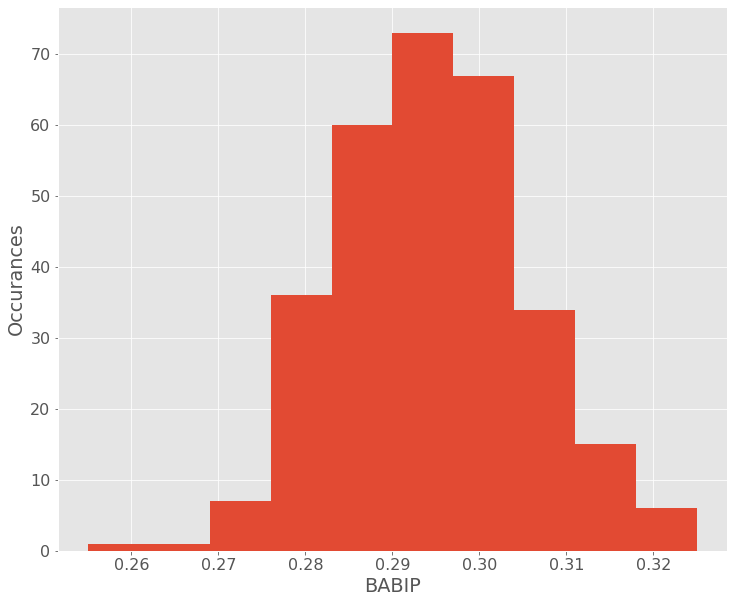

In [ ]:
fig3, ax = plt.subplots(1, 1)
ax.hist(d_metrics['BABIP'], label = 'BABIP')
ax.set_xlabel('BABIP')
ax.set_ylabel('Occurances')
fig3.show()

In [ ]:
min_babip = d_metrics['BABIP'].min()
print("The lowest BABIP allowed in a given season during the 2010's was {}".format(min_babip))

The lowest BABIP allowed in a given season during the 2010's was 0.255


Figure 3 may be the best illustration of just how insane the Cubs defensive BABIP was in 2016. The histogram shown contains every team's BABIP allowed in the league for every season of the 2010's (including the Cubs' other seasons) contained in bins (300 entries total). ***ALL*** the way to the left is the 2016 Chicago Cubs, with the best allowed BABIP of the *decade*. That number is practically off of the distribution curve entirely, in another category of impressive altogether. What this means is that the 2016 Cubs defense wasn't just good/lucky, they were historically, ***unsustainably*** so. This is reinforced by the return to the norm BABIP allowed they had the following season.

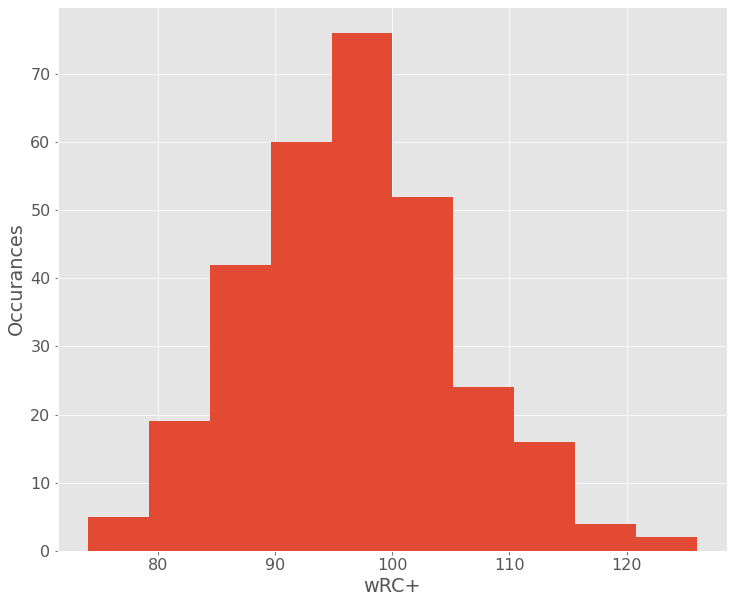

In [ ]:
fig4, ax = plt.subplots(1, 1)
ax.hist(o_metrics['wRC+'], label = 'wRC+')
ax.set_xlabel('wRC+')
ax.set_ylabel('Occurances')
fig4.show()

In [ ]:
perc_dec = o_metrics['wRC+'].quantile(.85)
print("The 85th percentile for wRC+ in the decade was {}".format(perc_dec))
perc_season = o_2016['wRC+'].quantile(.90)
print("The 90th percentile for wRC+ in 2016 was {}".format(perc_season))

The 85th percentile for wRC+ in the decade was 106.0
The 90th percentile for wRC+ in 2016 was 106.0


The Cubs offense was by no means carried by an incredibly lucky/skilled defense, however. Their wRC+ of 106 that season ranked in the 90th percentile of all offensive performances that season, and in the 85th percentile of all offensive performances that decade, which is quite good and just as likely helped carry the team to the World Series. Nevertheless, as the next section will show, that offensive performance wouldn't be enough to overcome the season performances by other teams that came after it.

##Other Successful Seasons##

To explore how good the Cubs actually were, their statistics from 2016 will be compared to some of the best team season performances in the following years. The teams looked at will be:



1.   The 2018 Red Sox (One of the best seasons in the MLB, won World Series)
2.   The 2019 Dodgers (Incredibly good team, beaten in a 5 game series by the 2019 Nationals)
3.   The 2019 New York Yankees (Another incredibly good team from that season)
4.   The 2019 Nationals (One of the most incredible underdog stories in baseball history, do yourself a favor if you don't know about this story and look it up, it's amazing)







###Organizing Data###

The following code isolates the statistics for the given teams by masking for those season & team performances and returning them from the defensive and offensive metrics for the decade.

In [ ]:
teams_omask = (o_metrics['Team'] == 'NYY') & (o_metrics['Season'] == 2019) | (
    (o_metrics['Team'] == 'BOS') & (o_metrics['Season'] == 2018)) | (
        (o_metrics['Team'] == 'LAD') & (o_metrics['Season'] == 2019)) | (
            (o_metrics['Team'] == 'CHC') & (o_metrics['Season'] == 2016)) | (
                (o_metrics['Team'] == 'WSN') & (o_metrics['Season'] == 2019))
team_ocomp = o_metrics[teams_omask].set_index(['Team', 'Season'])
team_ocomp.index = ['{}_{}'.format(i, j) for i, j in team_ocomp.index]

In [ ]:
teams_dmask = (d_metrics['Team'] == 'NYY') & (d_metrics['Season'] == 2019) | (
    (d_metrics['Team'] == 'BOS') & (d_metrics['Season'] == 2018)) | (
        (d_metrics['Team'] == 'LAD') & (d_metrics['Season'] == 2019)) | (
            (d_metrics['Team'] == 'CHC') & (d_metrics['Season'] == 2016)) | (
                (d_metrics['Team'] == 'WSN') & (d_metrics['Season'] == 2019))
            
team_dcomp = d_metrics[teams_dmask].set_index(['Team', 'Season'])
team_dcomp.index = ['{}_{}'.format(i, j) for i, j in team_dcomp.index]

###FIP Comparison###

Below shows a comparison of FIPs between the 2016 Cubs and the other teams.

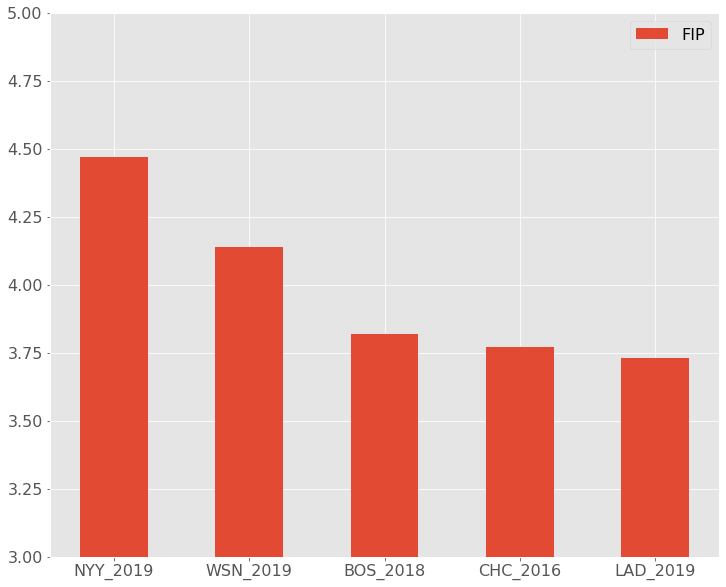

In [ ]:
fip = team_dcomp['FIP'].sort_values(ascending = False)
fig4, ax = plt.subplots(1, 1)
ax.bar(fip.index, fip,width = .5, label = 'FIP')
ax.set_ylim(3, 5)
ax.legend()
fig4.show()

By the FIP alone, the 2016 Cubs were about on par with two of the best teams of the decade, suggesting that their pitching performance was fairly good.

###wRC+ Comparison###

Below shows a comparison of wRC+ between the 2016 Cubs and the other teams.

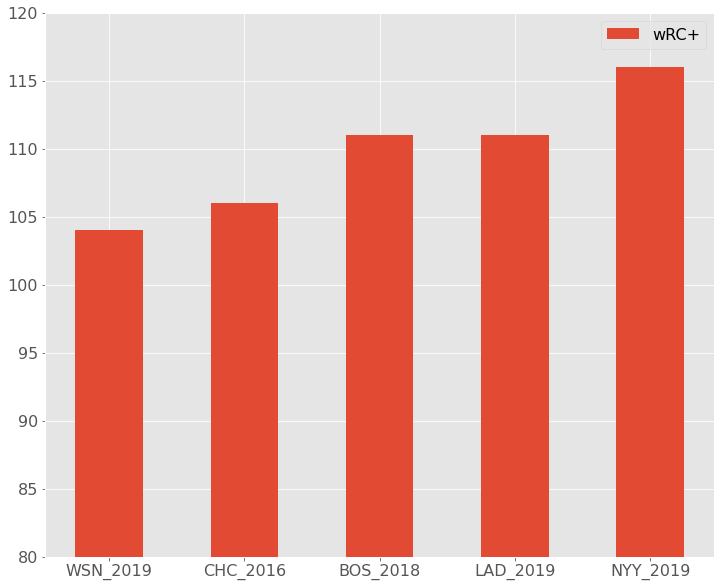

In [ ]:
wrc = team_ocomp['wRC+'].sort_values()
fig5, ax = plt.subplots(1, 1)
ax.bar(wrc.index, wrc, width = .5, label = 'wRC+')
ax.set_ylim(80, 120)
ax.legend()
fig5.show()

The wRC+ comparison shows that the 2016 Cubs failed to meet the offensive firepower of the better teams that followed it, even at the peak of its offensive capabilities. This is important because the Cubs offense famously flailed in the following seasons, consistently underperforming their expectations while better teams thrived.

###BABIP Comparison###

Below shows a comparison of BABIPs between the 2016 Cubs and the other teams.

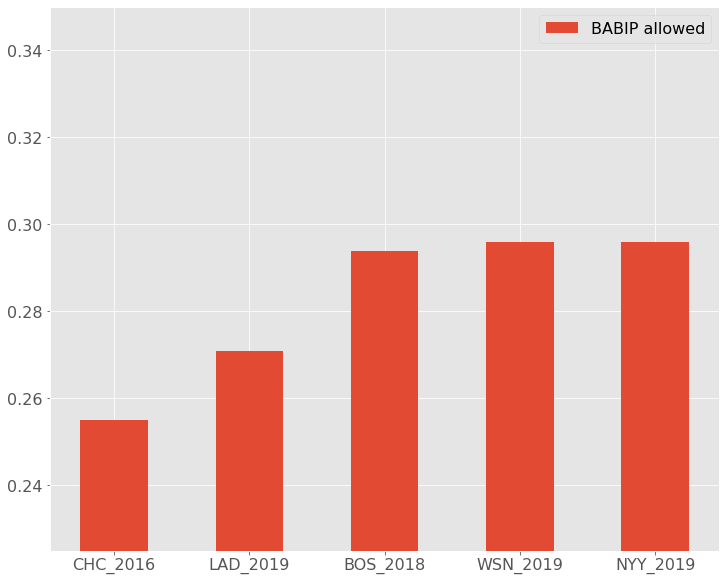

In [ ]:
babip = team_dcomp['BABIP'].sort_values()
fig6, ax = plt.subplots(1, 1)
ax.bar(babip.index, babip, width = .5, label = 'BABIP allowed')
ax.set_ylim(.225, .35)
ax.legend()
fig6.show()

As expected, the allowed BABIP was unparalleled even by the best teams of the decade, suggesting an incredible amount of luck was involved in the Cubs success. The regression back to their previous BABIP certainly hurt them in the following seasons.

##Conclusion##

Ultimately, if there is one takeaway from this study, it's that baseball has a lot of luck involved. With all of the data at our disposal, it still remains almost impossible to predict what will happen next. The 2016 Cubs embody that idea, and while they were a good team, they were bolstered by some very good fortune and a less competitive league than the seasons that followed. What is disappointing is that the hype surrounding the team was far from unwarranted; they were still incredibly young, their pitching staff was performing well, and their offense showed what seemed to be a glimpse of what it was truly capable of doing. Their failure to improve, combined with a lack of the luck that pushed them to their championship and an increased level of competition, ultimately led to their decline. Even at their peak performance, the 2016 Cubs likely would have had a much harder time beating any of the other incredible teams that came in the following seasons. 

As if to reinforce how important luck is, all one needs to do is look at the story of the 2019 Nationals. At one point in July of that year, the Nationals were about to be trade deadline sellers preparing to give up on the season, and instead went on to defeat two of the greatest teams ever assembled (one of which was found to be cheating soon after losing to the Nationals) and win the World Series. They did this being *worse* than the 2016 Cubs in practically every metric (including BABIP allowed), yet managed to pull off one of the greatest underdog stories in sports history.

Unlike the 2019 Nationals, however, who most if not all widely acknowledge were lucky as opposed to being consistently good, the 2016 Cubs were heavy favorites to win the World Series based on an incredible team record that season. Simply put, based on the numbers, the Cubs were a good team, but they got a lot more credit for being skilled instead of getting lucky than they deserved. It showed in their decline in performance and worse playoff stretches for the rest of the decade. The Cubs were a good team bolstered by good luck, but a failure to improve combined with better competition and worse luck made the promised dynasty a near impossibility.

##Sources##

1. fangraphs.com
2. teamrankings.com

